### The Data Story -- Building a Bayesian model

![](l6-img/world-map.png)
Given a map representing the Earth, you want to estimate how much of the surface is covered in water. You sample it randomly by tossing a pin to it and recording where it points to. You toss the pin on the map again and repeat the procedure. From this process, a sequences of surface samples are generated:

W L W W W L W L W

where W indicates water and L indicates land. This sequence of observations is the data. 

Our problem is how to use the data (the sequence of W and L) to decide among different possible proportions of water on the globe.

The data story in this case is simply a restatement of the sampling process:
1. The true proportion of water covering the globe is p.
1. A single toss on the map has a probability p of producing a water (W) observation. It has a probability 1 − p of producing a land (L) observation.
2. Each toss on the map is independent of the others.

Our problem is one of using the evidence—the sequence of map tosses—to decide among diﬀerent possible proportions of water on the map. Each possible proportion may be more or less plausible, given the evidence. A Bayesian model begins with one set of plausibilities assigned to each of these possibilities (the possible proportions of water on the map). These are the prior plausibilities. Then it updates them in light of the data, to produce the posterior plausibilities. This updating process is a kind of learning, called Bayesian updating.

![](l6-img/bayes_updating.png)

Bayesian inference: Logical answer to a question in the form of a model :

“How plausible is each proportion of water, given these data?”


### Likelihood

The likelihood is a mathematical formula that specifies the plausibility of the data given the conjecture (or hypothesis).The likelihood defines the probability of each observation conditional on the assumptions, i.e. the relative count of the number of ways of seeing data (probability), given a particular conjecture or hypothesis. Another way of putting it is: I have this hypothesis, what is the likelihood of seeing such data. 

The likelihood maps each conjecture (or hypothesis), in this case, the proportion of water on the map, onto the number of ways the data (in this case, W, L) could occur. You can build the likelihood from the basic assumptions on the how the data was sampled. The likelihood gives you the probability of any possible observation for any possible state of the world (such as proportion of water on the globe). It is also the number of ways each conjecture (p) could produce an observation (data sequence of W or L).

The likelihood is written L(p|w,n).  Note that is the opposite of how we write the same probability P(w,n|p). It is the likelihood of p, the probability of water in the map, given w and n. The w is the count of times of 'water' observations out of n trials. Another way of saying this if we observed, say, w=6 out of n=9 observations, what is the probability (proportion) of water on the map?

If you remember the binomial lesson, the likelihood of data (=value of a given p) can be found from the binomial distribution for a given p. The count of w's is distributed binomially where each w has a probability of p for n tosses in total. 

In the map example, both n and w are data—we believe that we have observed their values without error. That leaves p as an unknown parameter, and our Bayesian machine’s job is to describe what the data tell us about p.

!['Binomial Formula'](l6-img/binomial_likelihood.png)

For example, the likelihood of w=6 in n=9 trials for p=0.5, can be calculated as:
```
stats.binom.pmf(6, n=9, p=0.5)
```

In [24]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()


In [25]:
#The likelihood of w=6 in n=9 trials for p=0.5
stats.binom.pmf(6, n=9, p=0.5)

0.16406250000000003

### Bayesian Machinery

1. List variables: data & parameters (hypothesis) that we want to estimate
2. Get data distribution (likelihood)
3. Get _prior_ parameter distribution
4. Deduce _posterior_ parameter distribution via Bayes Theorem

Variables
n: number of tosses
nw: number of water landings
p: proportion of water on map

Parameters
p : can't be observed, has to be inferred (or estimated)

Bayesian estimate is always posterior distribution over parameters Pr(paramters|data).

!["Bayes Theorem"](l6-img/bayes_theorem.png)

The posterior distribution is a product of the prior distribution and likelihood.Top row: A ﬂat prior constructs a posterior that is simply proportional to the likelihood. Middle row: A step prior, assigning zero probability to all values less than 0.5, resulting in a truncated posterior. Bottom row: A peaked prior that shifs and skews the posterior, relative to the likelihood.

!['Posterior Distribution'](l6-img/posterior.png)


Let's define the code to obtain the posterior distribution. We use a method called grid approximation (as opposed to using a conjugate prior). Even if the parameters are continuouss, we can achieve an excellent approximation of the continuous posterior distribution by considering only a fnite grid of parameter values. At any particular value of a parameter, p′, it’s a simple matter to compute the posterior probability: just multiply the prior probability of p′ by the likelihood at p′. Repeating this procedure for each value in the grid generates an approximate picture of the exact posterior distribution. 



### How Grid Approximation works

This is obtained by multiplying each prior with the likelihood point by point. This is what is meant by grid approximation. We divide the graph into points, and multiple each point by point.

<img src="l6-img/grid-approx.png" width="400" />


In the context of the globe tossing problem, grid approximation works extremely well.
So let’s build a grid approximation for the model we’ve constructed so far. Here is the recipe:
1. Defne the grid. This means you decide how many points to use in estimating the posterior, and then you make a list of the parameter values on the grid.
2. Compute the value of the prior at each parameter value on the grid.
3. Compute the likelihood at each parameter value.
4. Compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood.
5. Finally, standardize the posterior, by dividing each value by the sum of all values

In [26]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    default values: grid_points=5, success=6, tosses=9
    """
    #1. define grid
    p_grid = np.linspace(0, 1, grid_points)

    #2. define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    #3. compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    #4. compute product of likelihood and prior
    raw_posterior = likelihood * prior

    #5. standardize the posterior, so it sums to 1
    posterior = raw_posterior / raw_posterior.sum()
    return p_grid, posterior

Text(0.5, 1.0, 'Likelihood')

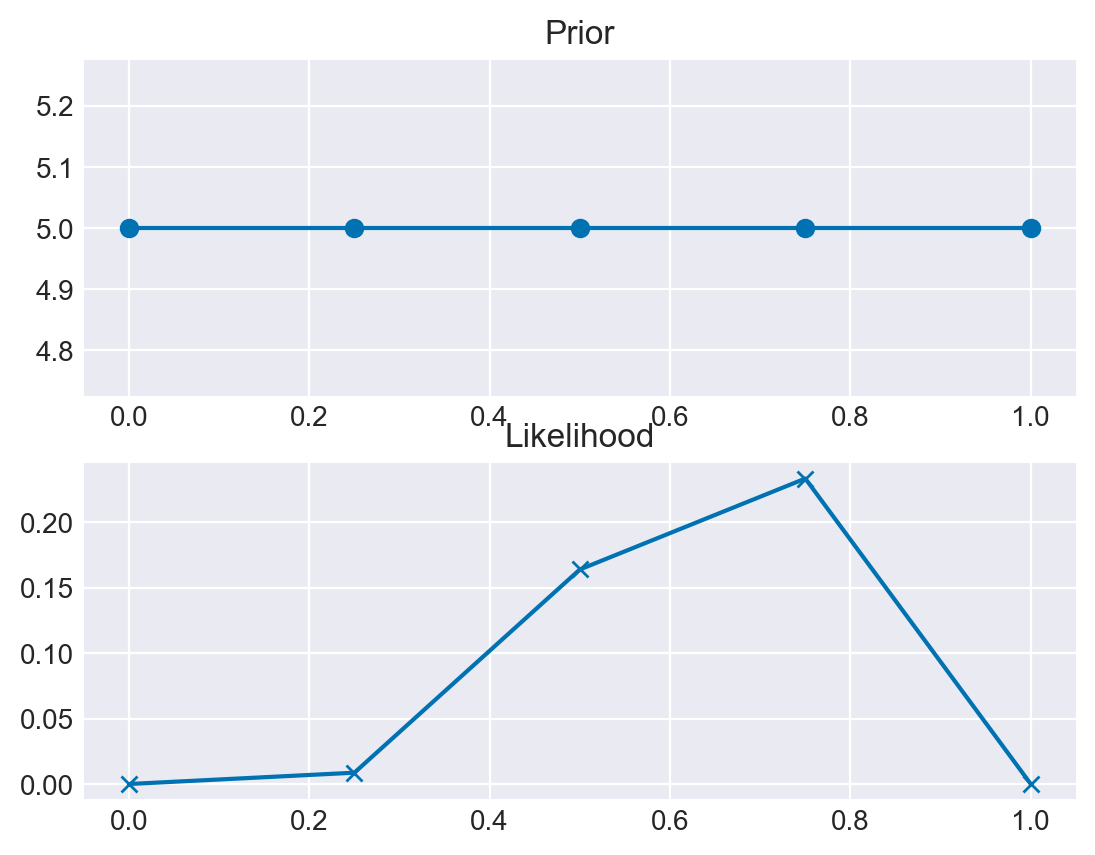

In [27]:

#define the grid; adjust the grid points number

grid_points=5
p_grid = np.linspace(0, 1, grid_points)

#plot the prior
prior = np.repeat(5, grid_points)
plt.subplot(2,1,1)
plt.plot(p_grid,prior,'o-')
plt.title('Prior')

#plot the likelihood
success=6
tosses=9
likelihood = stats.binom.pmf(success, tosses, p_grid)
plt.subplot(2,1,2)
plt.plot(p_grid,likelihood,'x-')
plt.title('Likelihood')


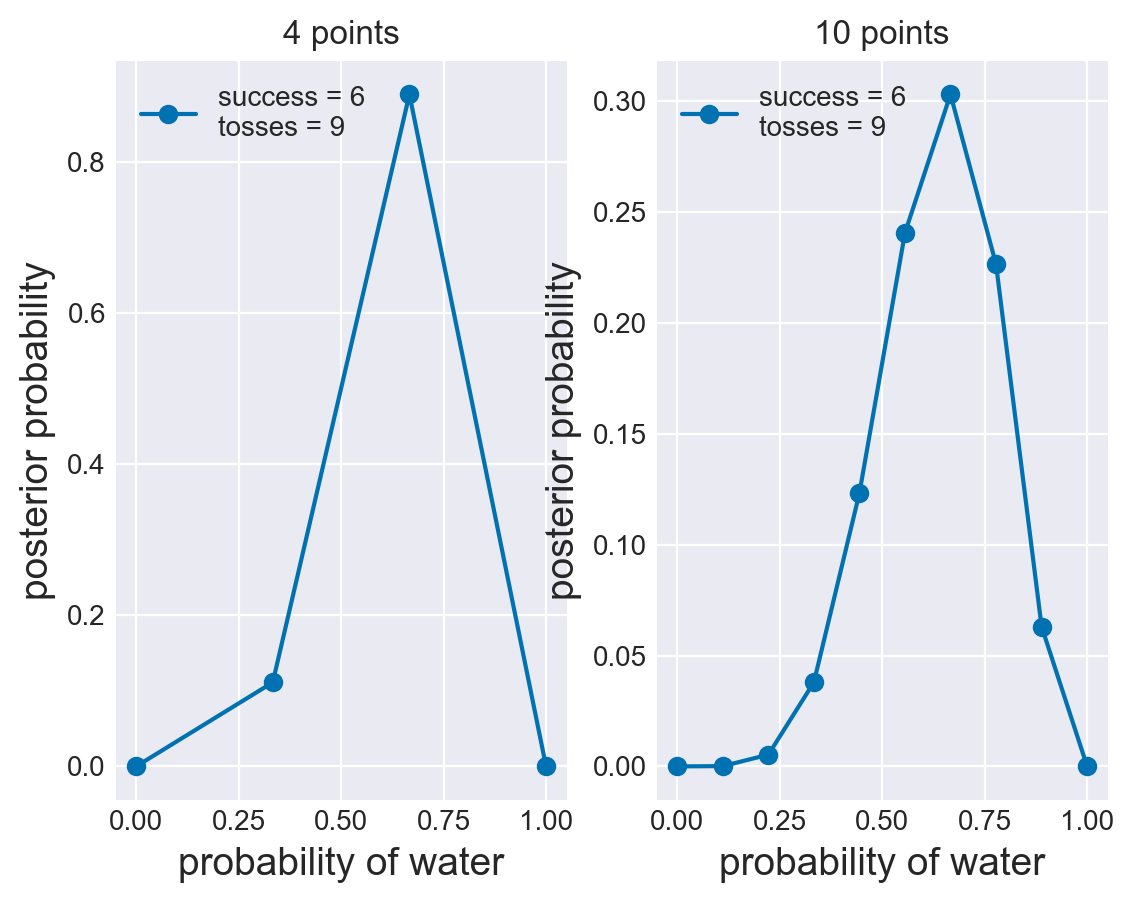

In [28]:
points = 4
w, n = 6,9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(1,2,1)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

points = 10
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(1,2,2)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);


What __happens__ if you increase the sampling points for p? We are computing posterior distribution by grid approximation. In each plot, the posterior distribution for the map toss data and model is approximated with a fnite number of evenly spaced points. With only 4 points (above, left), the approximation is terrible. But with 20 points (below left), the approximation is already quite good.

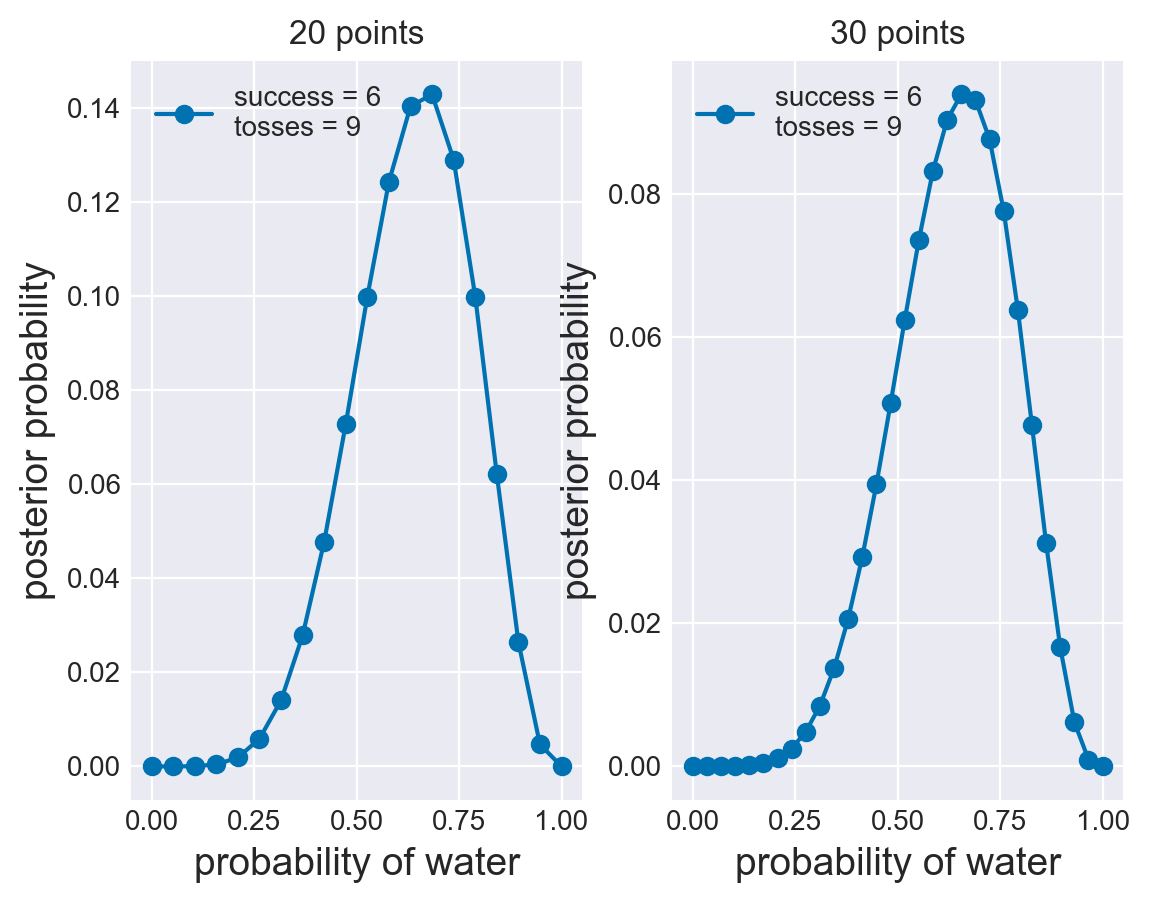

In [29]:
            
points = 20
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(1,2,1)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

points = 30
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.subplot(1,2,2)            
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

plt.show()


### Your Turn

Ok, draw a map with land and water mass in a grid. Randomize selection of a point on the map - use that to decide if it is land or water. Decide on how many experiments you want and then perform the experiment. After each experiment you should re-estimate the results by calculating the posterior and using the previous posterior as the prior. For example:

1. Experiment 1, 15 trials
2. Experiment 2, 8 trials

Estimate the probability of water after each experiment. 



/var/folders/f7/lqjcwz1n2kb6zhtcyg6czvx40000gn/T/ipykernel_2704/3508858541.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cmap[grid[i, j]], edgecolor='black', linewidth=1))


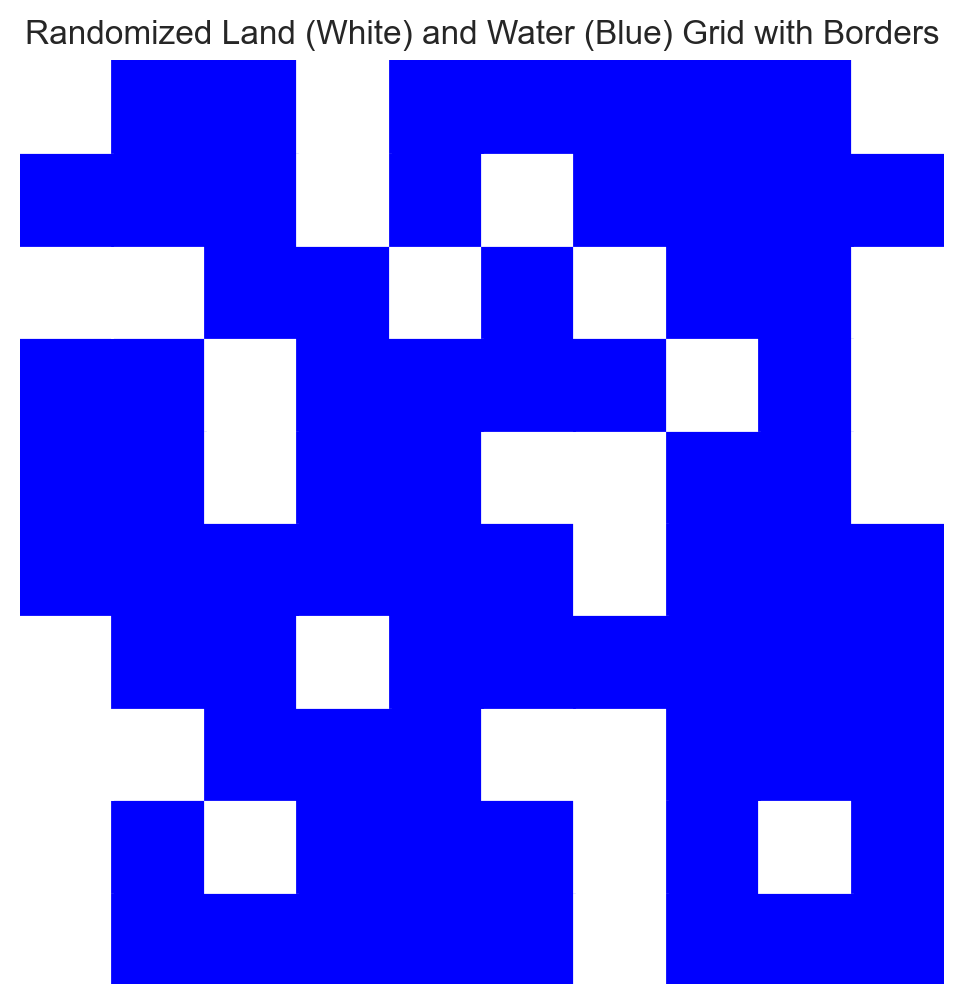

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
grid_size = 10

# Calculate the number of blue and white cells
total_cells = grid_size * grid_size
num_blue = 70
num_white = total_cells - num_blue

# Create an array with the appropriate number of blue and white cells
grid = np.array(['blue'] * num_blue + ['white'] * num_white)

# Shuffle the array to randomize the distribution
np.random.shuffle(grid)

# Reshape the array into a 10x10 grid
grid = grid.reshape((grid_size, grid_size))

# Create a color map
cmap = {'blue': '#0000FF', 'white': '#FFFFFF'}

# Plot the grid
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(grid_size):
    for j in range(grid_size):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cmap[grid[i, j]], edgecolor='black', linewidth=1))

# Set the limits and aspect ratio
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')

# Remove the axes
ax.axis('off')

# Show the plot
plt.title('Randomized Land (White) and Water (Blue) Grid with Borders')
plt.show()

# Save the grid to a file
np.save('grid.npy', grid)

### Experiment 1 (15 Trials)

/var/folders/f7/lqjcwz1n2kb6zhtcyg6czvx40000gn/T/ipykernel_2704/2664063266.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cmap[grid[i, j]], edgecolor='black', linewidth=1))


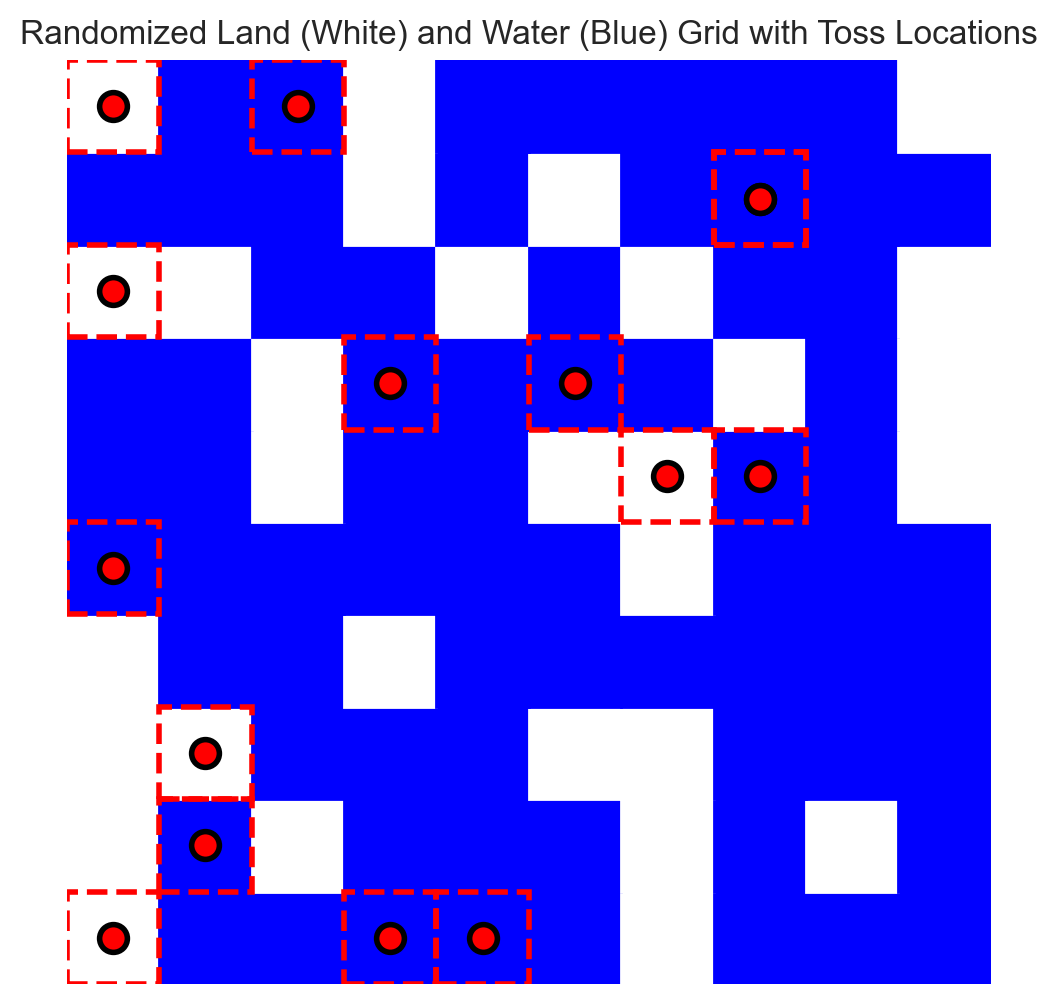

Toss 1: Location (6, 5) - Landed on L
Toss 2: Location (7, 8) - Landed on W
Toss 3: Location (4, 0) - Landed on W
Toss 4: Location (2, 9) - Landed on W
Toss 5: Location (7, 5) - Landed on W
Toss 6: Location (7, 8) - Landed on W
Toss 7: Location (3, 0) - Landed on W
Toss 8: Location (0, 9) - Landed on L
Toss 9: Location (3, 6) - Landed on W
Toss 10: Location (1, 2) - Landed on L
Toss 11: Location (0, 4) - Landed on W
Toss 12: Location (0, 7) - Landed on L
Toss 13: Location (0, 0) - Landed on L
Toss 14: Location (1, 1) - Landed on W
Toss 15: Location (5, 6) - Landed on W
List of results: ['L', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'L', 'L', 'W', 'W']


In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Load the grid from the file
grid = np.load('grid.npy')

# Define the grid size
grid_size = grid.shape[0]

# Create a color map
cmap = {'blue': '#0000FF', 'white': '#FFFFFF'}

# Initialize the list to store the results of the tosses
toss_results = []

# Perform 15 trials
num_trials = 15
toss_locations = []

for _ in range(num_trials):
    # Randomly select a cell to mark the toss location
    toss_x = np.random.randint(0, grid_size)
    toss_y = np.random.randint(0, grid_size)
    
    # Record the toss location and result
    toss_locations.append((toss_x, toss_y))
    result = 'W' if grid[toss_y, toss_x] == 'blue' else 'L'
    toss_results.append(result)

# Plot the grid
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(grid_size):
    for j in range(grid_size):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cmap[grid[i, j]], edgecolor='black', linewidth=1))

# Mark the tossed locations with a dotted area
for (toss_x, toss_y) in toss_locations:
    ax.plot(toss_x + 0.5, toss_y + 0.5, 'ro', markersize=10, markeredgewidth=2, markeredgecolor='black')
    ax.add_patch(plt.Rectangle((toss_x, toss_y), 1, 1, fill=None, edgecolor='red', linestyle='--', linewidth=2))

# Set the limits and aspect ratio
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')

# Remove the axes
ax.axis('off')

# Show the plot
plt.title('Randomized Land (White) and Water (Blue) Grid with Toss Locations')
plt.show()

# Print the results of the tosses
for i, (location, result) in enumerate(zip(toss_locations, toss_results), 1):
    print(f"Toss {i}: Location {location} - Landed on {result}")

# Print the list of results
print("\nList of results:", toss_results)

In [49]:
def posterior_grid_with_prior(prior, grid_points=15, success=5, tosses=6):
    """
    prior: an array of prior probabilities
    grid_points: number of points in the grid
    success: number of "W" outcomes
    tosses: number of trials
    """
    #1. define grid
    p_grid = np.linspace(0, 1, grid_points)

    #2. compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    #3. compute product of likelihood and prior
    raw_posterior = likelihood * prior

    #4. standardize the posterior, so it sums to 1
    posterior = raw_posterior / raw_posterior.sum()
    return p_grid, posterior



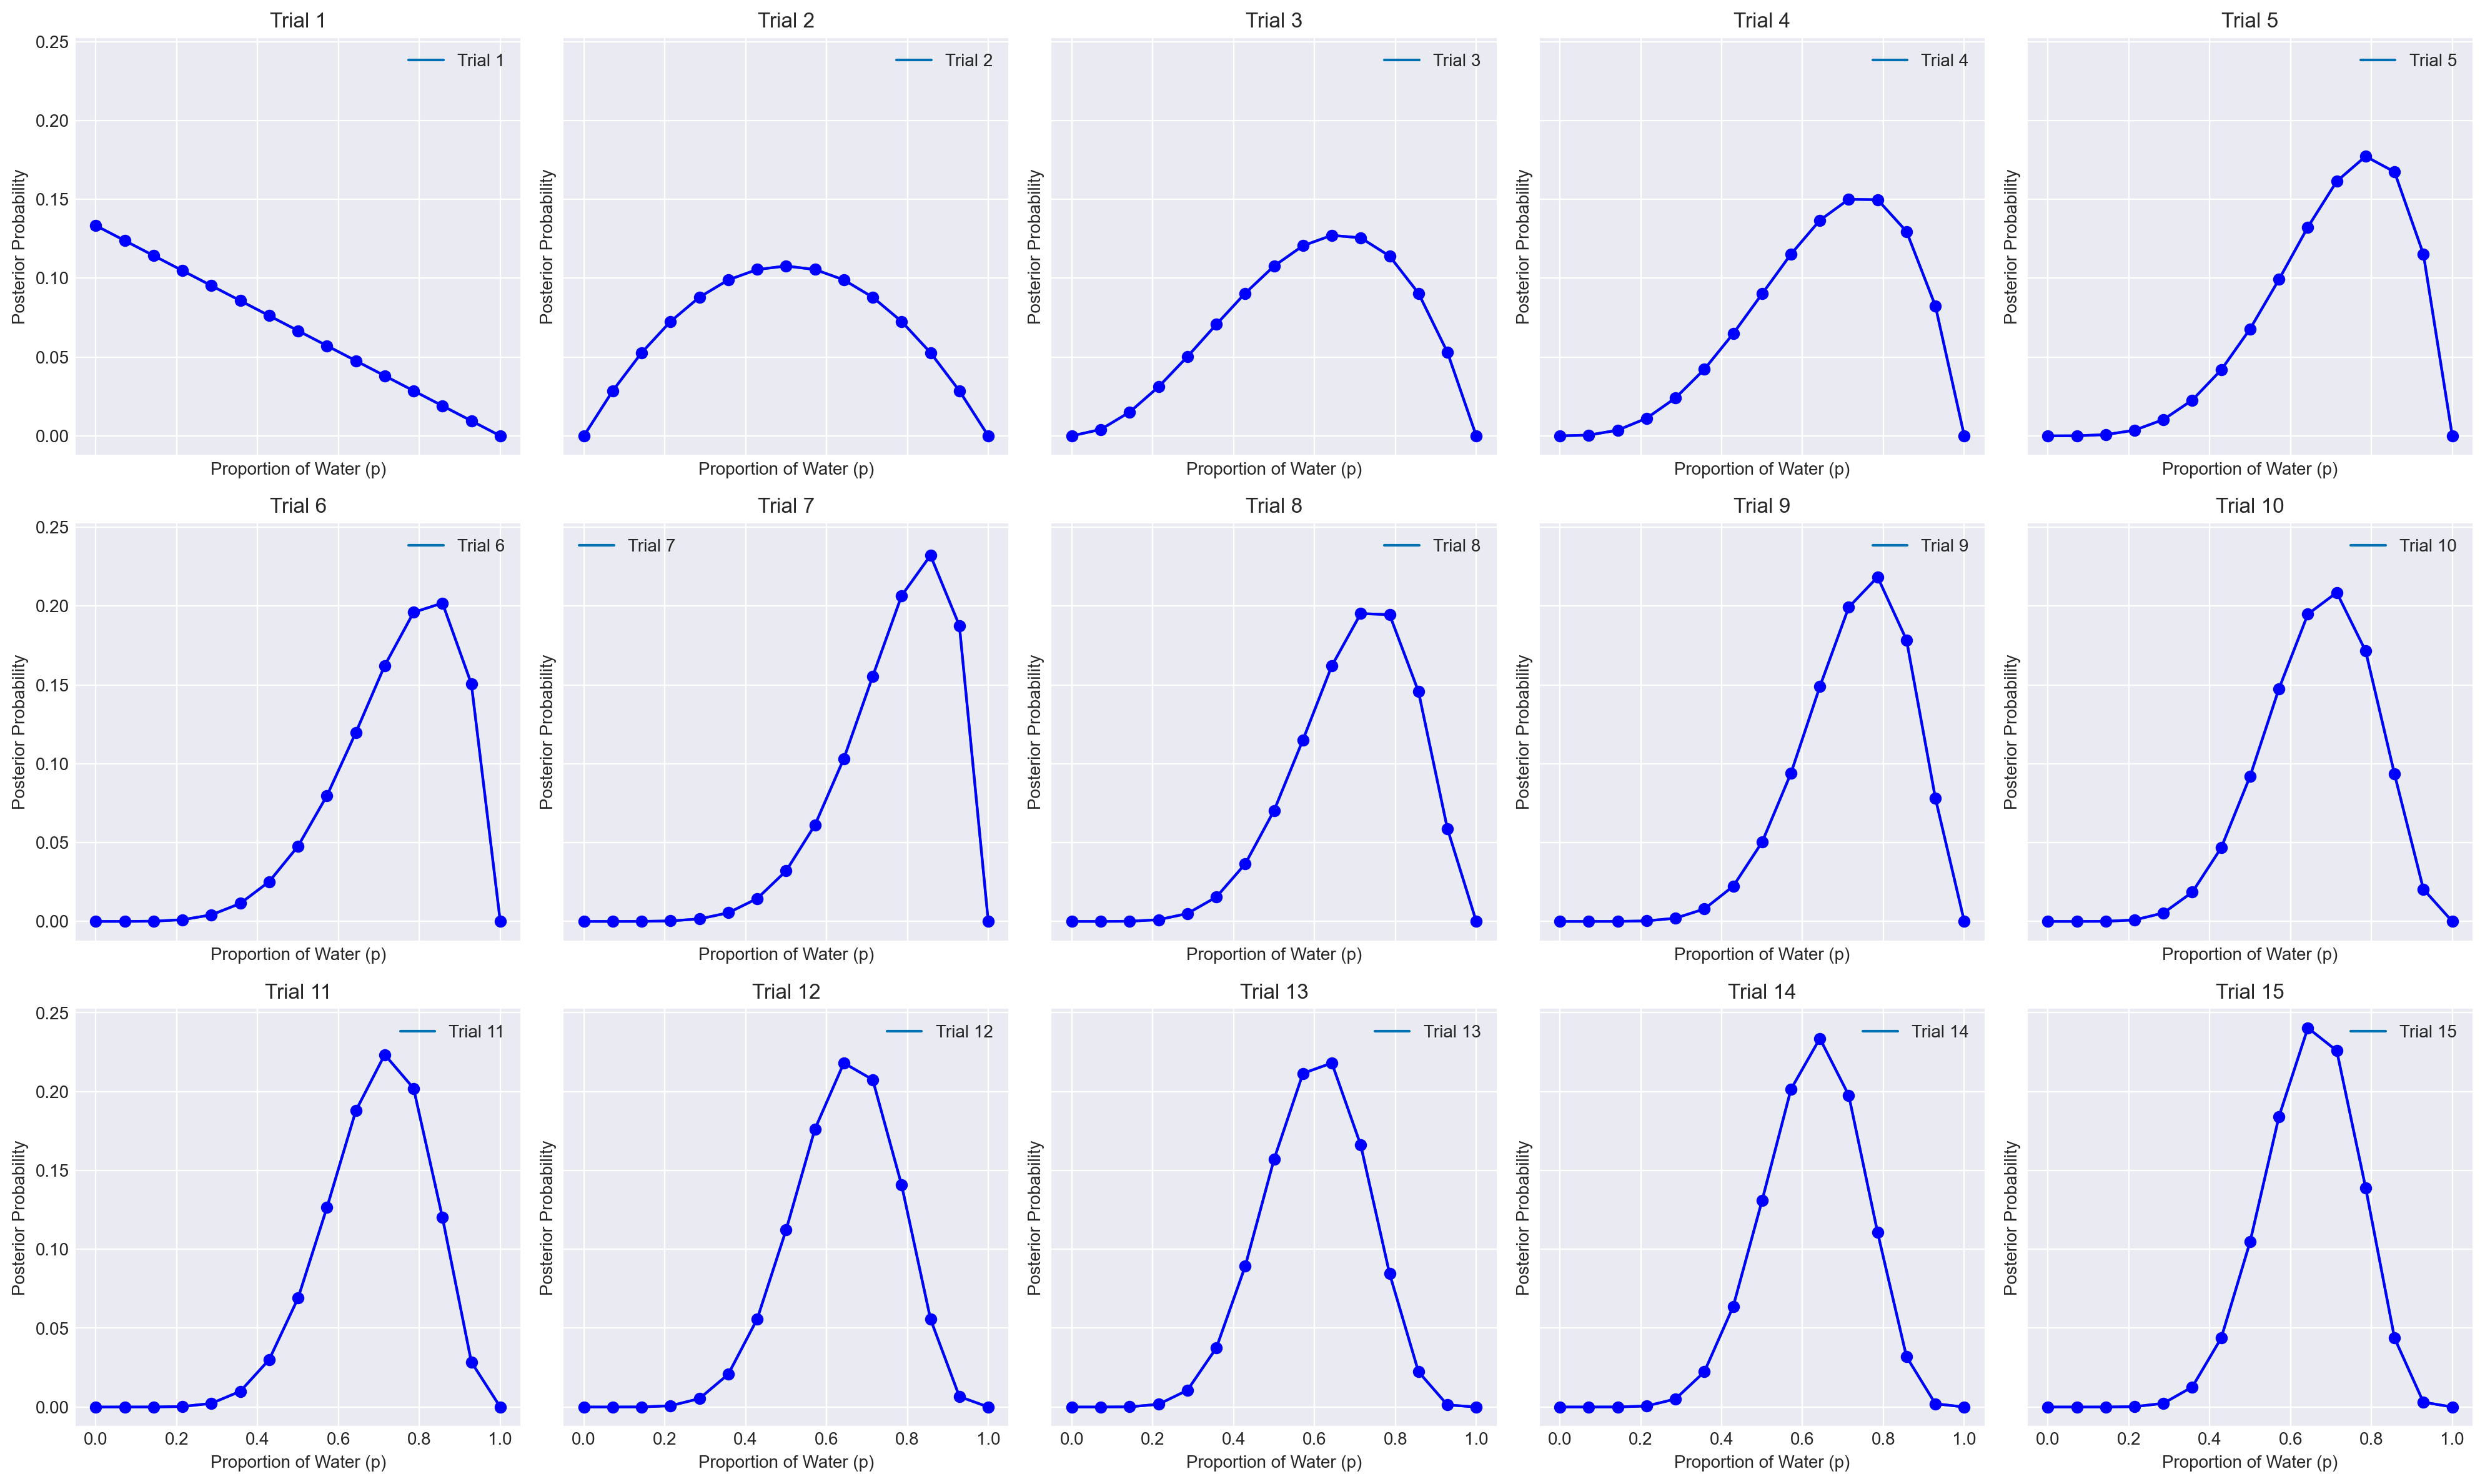

In [66]:

# Create a figure for plotting
fig, axes = plt.subplots(3, 5, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

# Plot the posterior for each trial
for i in range(1, num_trials + 1):
    # Define the prior for each trial
    prior = np.ones(num_trials)
    
    # Calculate the posterior using the prior
    success = np.sum(np.array(toss_results[:i]) == 'W')
    p_grid, posterior = posterior_grid_with_prior(prior, grid_points=num_trials, success=success, tosses=i)
    
    # Plot the posterior
    axes[i-1].plot(p_grid, posterior, label=f'Trial {i}')
    axes[i-1].set_title(f'Trial {i}')
    axes[i-1].set_xlabel('Proportion of Water (p)')
    axes[i-1].set_ylabel('Posterior Probability')
    axes[i-1].legend()
    
    # Add dotted lines for the posterior
    axes[i-1].plot(p_grid, posterior, 'bo-')

# Hide any unused subplots
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Experiment 2 (8 Trials)

### Experiment 2 (8 Trials)

/var/folders/f7/lqjcwz1n2kb6zhtcyg6czvx40000gn/T/ipykernel_2704/813588058.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cmap[grid[i, j]], edgecolor='black', linewidth=1))


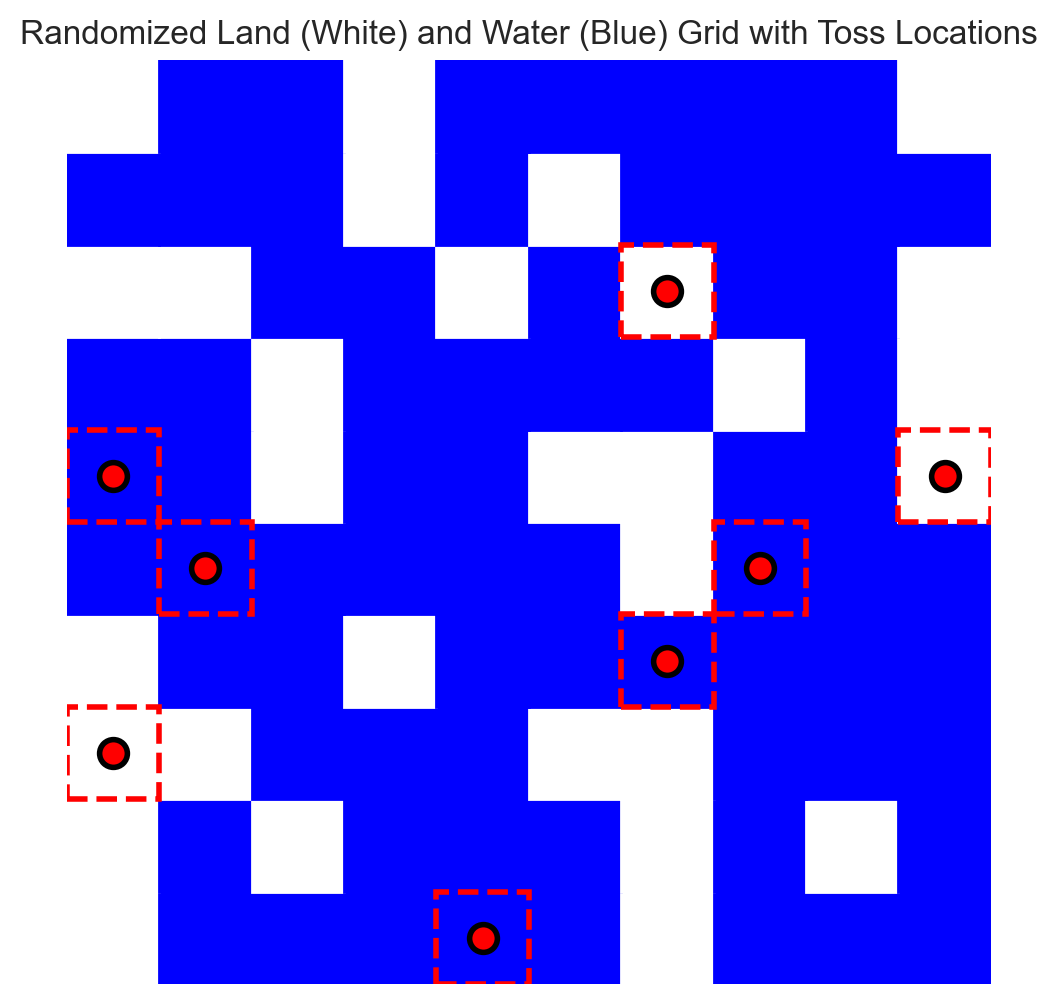

Toss 1: Location (4, 0) - Landed on W
Toss 2: Location (0, 2) - Landed on L
Toss 3: Location (1, 4) - Landed on W
Toss 4: Location (9, 5) - Landed on L
Toss 5: Location (6, 3) - Landed on W
Toss 6: Location (6, 7) - Landed on L
Toss 7: Location (0, 5) - Landed on W
Toss 8: Location (7, 4) - Landed on W

List of results: ['W', 'L', 'W', 'L', 'W', 'L', 'W', 'W']


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Load the grid from the file
grid = np.load('grid.npy')

# Define the grid size
grid_size = grid.shape[0]

# Create a color map
cmap = {'blue': '#0000FF', 'white': '#FFFFFF'}

# Initialize the list to store the results of the tosses
toss_results = []

# Perform 8 trials
num_trials = 8
toss_locations = []

for _ in range(num_trials):
    # Randomly select a cell to mark the toss location
    toss_x = np.random.randint(0, grid_size)
    toss_y = np.random.randint(0, grid_size)
    
    # Record the toss location and result
    toss_locations.append((toss_x, toss_y))
    result = 'W' if grid[toss_y, toss_x] == 'blue' else 'L'
    toss_results.append(result)

# Plot the grid
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(grid_size):
    for j in range(grid_size):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=cmap[grid[i, j]], edgecolor='black', linewidth=1))

# Mark the tossed locations with a dotted area
for (toss_x, toss_y) in toss_locations:
    ax.plot(toss_x + 0.5, toss_y + 0.5, 'ro', markersize=10, markeredgewidth=2, markeredgecolor='black')
    ax.add_patch(plt.Rectangle((toss_x, toss_y), 1, 1, fill=None, edgecolor='red', linestyle='--', linewidth=2))

# Set the limits and aspect ratio
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')

# Remove the axes
ax.axis('off')

# Show the plot
plt.title('Randomized Land (White) and Water (Blue) Grid with Toss Locations')
plt.show()

# Print the results of the tosses
for i, (location, result) in enumerate(zip(toss_locations, toss_results), 1):
    print(f"Toss {i}: Location {location} - Landed on {result}")

# Print the list of results
print("\nList of results:", toss_results)

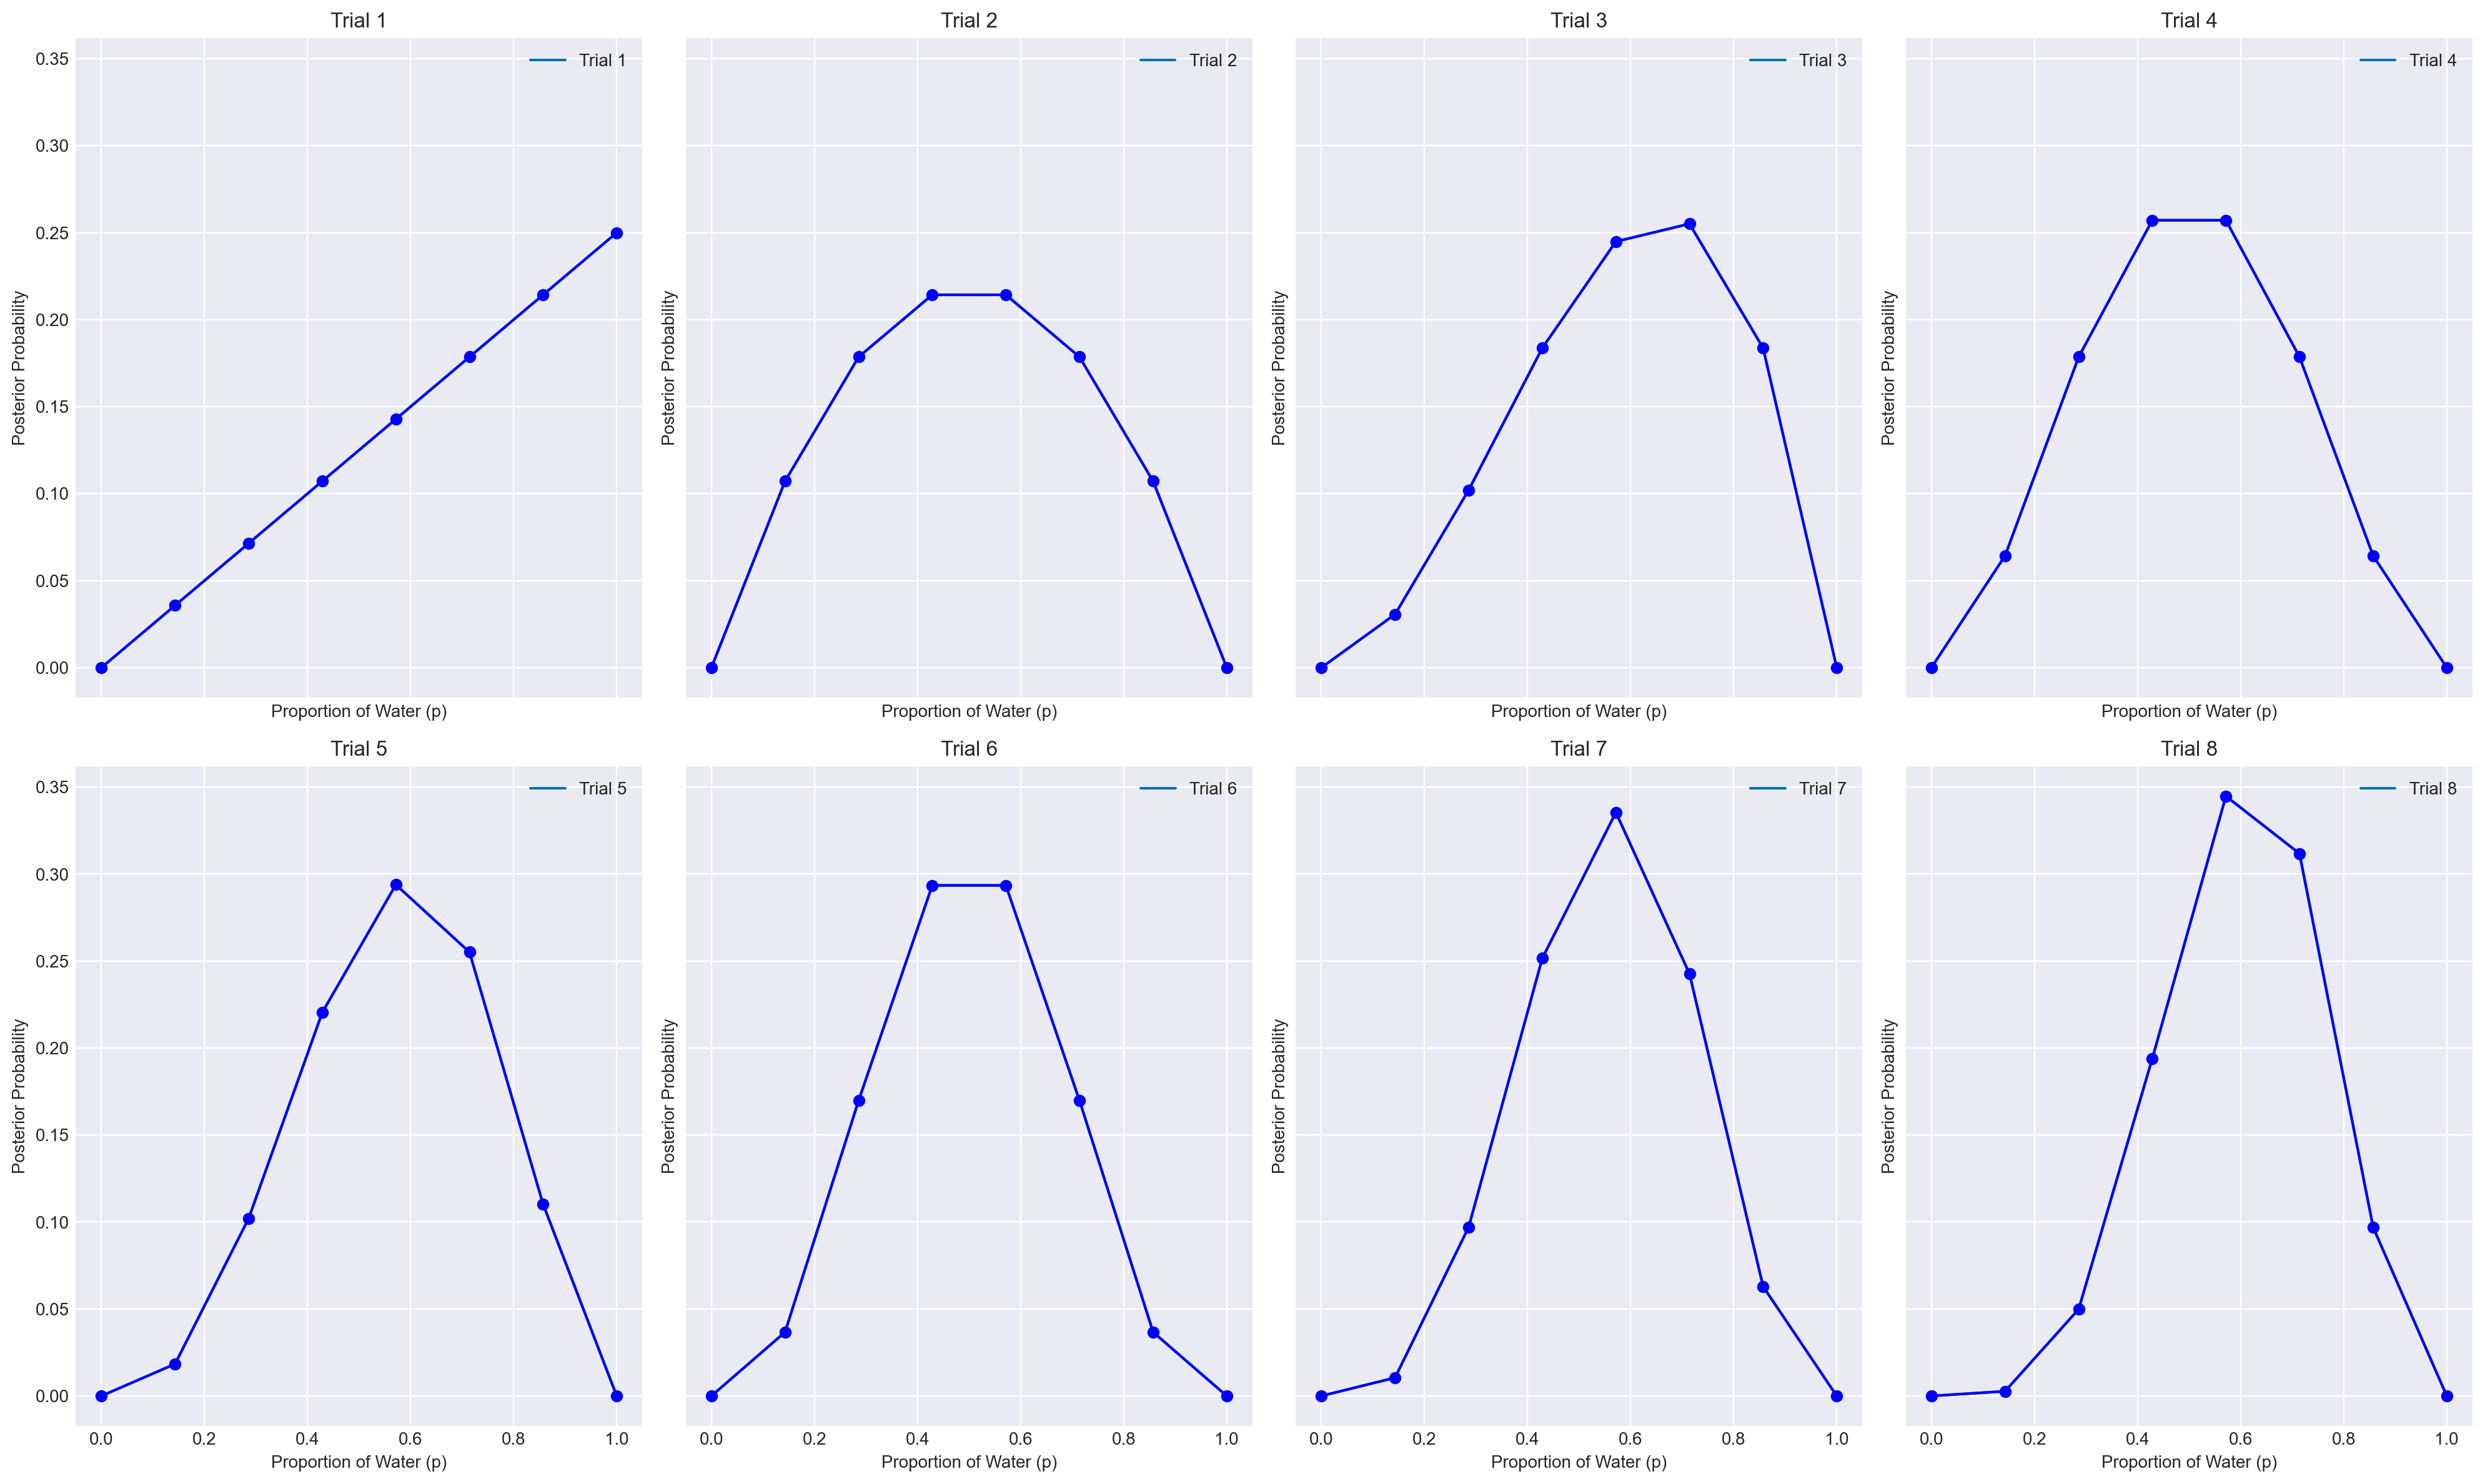

In [69]:

# Create a figure for plotting
fig, axes = plt.subplots(2, 4, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

# Plot the posterior for each trial
for i in range(1, num_trials + 1):
    # Define the prior for each trial
    prior = np.ones(num_trials)
    
    # Calculate the posterior using the prior
    success = np.sum(np.array(toss_results[:i]) == 'W')
    p_grid, posterior = posterior_grid_with_prior(prior, grid_points=num_trials, success=success, tosses=i)
    
    # Plot the posterior
    axes[i-1].plot(p_grid, posterior, label=f'Trial {i}')
    axes[i-1].set_title(f'Trial {i}')
    axes[i-1].set_xlabel('Proportion of Water (p)')
    axes[i-1].set_ylabel('Posterior Probability')
    axes[i-1].legend()
    
    # Add dotted lines for the posterior
    axes[i-1].plot(p_grid, posterior, 'bo-')

# Hide any unused subplots
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()